In [36]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns


In [37]:
samples, classes = make_classification(n_samples=1000, n_features=3, n_informative=3, n_redundant=0, n_classes=3)
fig = px.scatter_3d(x=samples[:, 0], y=samples[:, 1], z=samples[:, 2], color=classes)
fig.show()

[[46  6 18]
 [ 9 55  4]
 [10  5 47]]
              precision    recall  f1-score   support

           0       0.71      0.66      0.68        70
           1       0.83      0.81      0.82        68
           2       0.68      0.76      0.72        62

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200


<Axes: xlabel='Значение K', ylabel='Ошибка'>

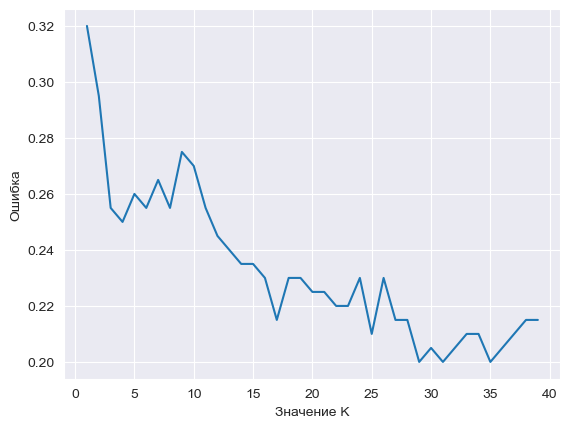

In [38]:
samples_train, samples_test, classes_train, classes_test = train_test_split(samples, classes, train_size=0.8)
samples_train = StandardScaler().fit_transform(samples_train)
classifier = KNeighborsClassifier(n_neighbors=5).fit(samples_train, classes_train)
classes_prediction = classifier.predict(samples_test)
print(confusion_matrix(classes_test, classes_prediction))
print(classification_report(classes_test, classes_prediction))
error = pd.DataFrame(columns=['Значение K', 'Ошибка'])
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(samples_train, classes_train)
    prediction_i = knn.predict(samples_test)
    error.loc[len(error.index)] = [i, np.mean(prediction_i != classes_test)]
sns.lineplot(data=error, x='Значение K', y='Ошибка')

In [39]:
model = LinearRegression()
variables = ['X', 'Y', 'Z']
print('Для тренировочного набора данных')
for i in range(3):
    variable = np.array(samples_train[:, i])
    target_variable = np.array(classes_train)
    model.fit(variable.reshape(-1, 1), target_variable)
    print(variables[i], end=':\n')
    print("Коэффициент: ", model.coef_[0])
    print("Пересечение: ", model.intercept_)
print()
print('Для тестового набора данных')
for i in range(3):
    variable = np.array(samples_test[:, i])
    target_variable = np.array(classes_test)
    model.fit(variable.reshape(-1, 1), target_variable)
    print(variables[i], end=':\n')
    print("Коэффициент: ", model.coef_[0])
    print("Пересечение: ", model.intercept_)

Для тренировочного набора данных
X:
Коэффициент:  -0.2416988252396044
Пересечение:  1.01375
Y:
Коэффициент:  0.24513434667478398
Пересечение:  1.01375
Z:
Коэффициент:  0.43585138255932765
Пересечение:  1.01375

Для тестового набора данных
X:
Коэффициент:  -0.12146504557618526
Пересечение:  0.9076039245023886
Y:
Коэффициент:  0.12450001884905768
Пересечение:  0.9993805900553042
Z:
Коэффициент:  0.2725784460776207
Пересечение:  0.9771392236959684


In [40]:
print("Для тренировочного набора данных")
for i in range(3):
    variable = np.array(samples_train[:, i])
    r_squared = r2_score(variable.reshape(-1, 1), classes_train)
    print(variables[i], end=':\n')
    print("R-квадрат:", r_squared)
print()
print("Для тестового набора данных")
for i in range(3):
    variable = np.array(samples_test[:, i])
    r_squared = r2_score(variable.reshape(-1, 1), classes_test)
    print(variables[i], end=':\n')
    print("R-квадрат:", r_squared)

Для тренировочного набора данных
X:
R-квадрат: -2.177147650479209
Y:
R-квадрат: -1.2034813066504335
Z:
R-квадрат: -0.8220472348813459

Для тестового набора данных
X:
R-квадрат: -1.6106151053569073
Y:
R-квадрат: -0.8891147340793117
Z:
R-квадрат: -0.3303735296557868
